In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:

trades = pd.read_csv('/home/josamhany/Historical Trader project/historical_data.csv')
sent = pd.read_csv('/home/josamhany/Historical Trader project/fear_greed_index.csv')

In [49]:
trades.shape

(211224, 16)

In [50]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [51]:
sent.shape

(2644, 4)

In [52]:
sent.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [53]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [54]:
sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [55]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True)
sent['date'] = pd.to_datetime(sent['date'])

In [56]:
trades['Timestamp'].head()

0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: Timestamp, dtype: float64

In [57]:
trades['Coin'].value_counts().head(10)

Coin
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
Name: count, dtype: int64

In [58]:
trades['Coin'] = trades['Coin'].str.replace(r'^@(\d+)', r'TOKEN_\1', regex=True)

In [59]:
trades['Coin'].value_counts()

Coin
HYPE         68005
TOKEN_107    29992
BTC          26064
ETH          11158
SOL          10691
             ...  
TOKEN_45         1
TOKEN_61         1
TOKEN_32         1
TOKEN_6          1
TOKEN_11         1
Name: count, Length: 246, dtype: int64

In [60]:
trades = trades[trades['Coin'] == 'BTC'].copy()

In [61]:
trades['Side'] = trades['Side'].str.lower()
trades['Direction'] = trades['Direction'].str.lower()

In [62]:
num_cols = ['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee','Trade ID']
for c in num_cols:
    if c in trades.columns:
        trades[c] = pd.to_numeric(trades[c], errors='coerce')

In [63]:
trades['dt'] = pd.to_datetime(trades['Timestamp IST'])
trades['date'] = trades['dt'].dt.date
trades['date'] = pd.to_datetime(trades['date'])

In [64]:
daily = trades.groupby('date').apply(
    lambda g: pd.Series({
        'total_trades': len(g),
        'total_pnl': g['Closed PnL'].sum(),
        'mean_pnl': g['Closed PnL'].mean(),
        'median_pnl': g['Closed PnL'].median(),
        'pct_pos': (g['Closed PnL'] > 0).sum() / len(g),
        'pct_zero': (g['Closed PnL'] == 0).sum() / len(g),
        'avg_size_usd': g['Size USD'].mean(),
        'median_size_usd': g['Size USD'].median()
    })
).reset_index()

In [65]:
daily.head()

,date,total_trades,total_pnl,mean_pnl,median_pnl,pct_pos,pct_zero,avg_size_usd,median_size_usd
0,2023-12-05,2.0,0.000000,0.000000,0.000000,0.000000,1.000000,12499.310000,12499.310
1,2023-12-14,2.0,-527.233130,-263.616565,-263.616565,0.000000,0.000000,12762.920000,12762.920
2,2023-12-22,7.0,141.832675,20.261811,0.000000,0.285714,0.714286,8459.450000,2413.840
3,2023-12-24,12.0,-5.698476,-0.474873,0.000000,0.333333,0.500000,16670.533333,4193.480
4,2023-12-29,4.0,24.302050,6.075512,0.038870,0.750000,0.250000,15777.707500,15747.215


In [66]:
coin_daily = trades.groupby(['date','Coin']).agg(
    trades_count=('Closed PnL','count'),
    total_pnl=('Closed PnL','sum'),
    mean_pnl=('Closed PnL','mean'),
    pct_pos=('Closed PnL', lambda s: (s>0).sum()/s.count())
).reset_index()

In [67]:
sent['date'] = pd.to_datetime(sent['date']).dt.date
sent = sent.groupby('date').agg({'classification': lambda s: s.mode()[0] if len(s)>0 else np.nan}).reset_index()
sent['date'] = pd.to_datetime(sent['date'])
# map to numeric
mapping = {'Extreme Fear':0,'Fear':0.25, 'Neutral':0.5, 'Greed':0.75, 'Extreme Greed':1}
# if there are other labels, map or create a sentiment_score column if numeric already
sent['sent_score'] = sent['classification'].map(mapping)
# if there are numeric columns in sentiment, prefer them

In [68]:
df = pd.merge(daily, sent.rename(columns={'Date':'date'}), on='date', how='left')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             286 non-null    datetime64[ns]
 1   total_trades     286 non-null    float64       
 2   total_pnl        286 non-null    float64       
 3   mean_pnl         286 non-null    float64       
 4   median_pnl       286 non-null    float64       
 5   pct_pos          286 non-null    float64       
 6   pct_zero         286 non-null    float64       
 7   avg_size_usd     286 non-null    float64       
 8   median_size_usd  286 non-null    float64       
 9   classification   286 non-null    object        
 10  sent_score       286 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 24.7+ KB


In [70]:
df['sent_score'] = df['sent_score'].fillna(method='ffill').fillna(method='bfill')

/tmp/ipykernel_98436/3929134615.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sent_score'] = df['sent_score'].fillna(method='ffill').fillna(method='bfill')


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             286 non-null    datetime64[ns]
 1   total_trades     286 non-null    float64       
 2   total_pnl        286 non-null    float64       
 3   mean_pnl         286 non-null    float64       
 4   median_pnl       286 non-null    float64       
 5   pct_pos          286 non-null    float64       
 6   pct_zero         286 non-null    float64       
 7   avg_size_usd     286 non-null    float64       
 8   median_size_usd  286 non-null    float64       
 9   classification   286 non-null    object        
 10  sent_score       286 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 24.7+ KB


In [72]:
df['classification'].value_counts()

classification
Greed            103
Extreme Greed     68
Fear              56
Neutral           47
Extreme Fear      12
Name: count, dtype: int64

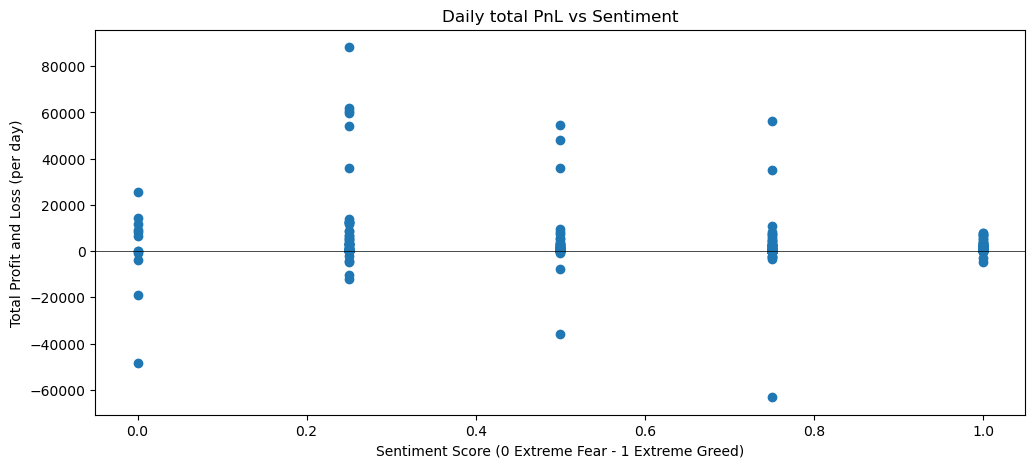

In [73]:
plt.figure(figsize=(12,5))
plt.scatter(df['sent_score'], df['total_pnl'])
plt.xlabel('Sentiment Score (0 Extreme Fear - 1 Extreme Greed)')
plt.ylabel('Total Profit and Loss (per day)')
plt.title('Daily total PnL vs Sentiment')
plt.axhline(0, color='k', linewidth=0.5)
plt.show()


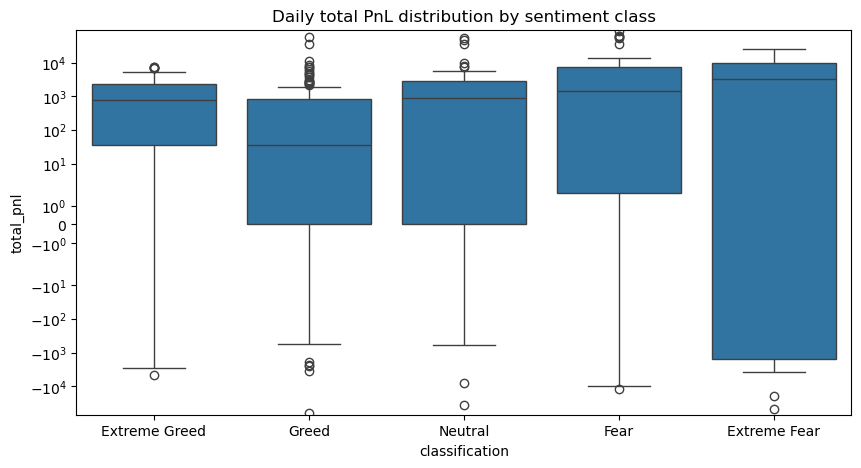

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x='classification', y='total_pnl', data=df)
plt.yscale('symlog')  # better for outliers; change if needed
plt.title('Daily total PnL distribution by sentiment class')
plt.show()


In [75]:
# simple Pearson correlation
corr = df[['total_pnl','mean_pnl','pct_pos','sent_score']].corr()
print("Correlation matrix:\n", corr)

Correlation matrix:
             total_pnl  mean_pnl   pct_pos  sent_score
total_pnl    1.000000  0.298064  0.160206   -0.158196
mean_pnl     0.298064  1.000000  0.425527    0.040510
pct_pos      0.160206  0.425527  1.000000   -0.014760
sent_score  -0.158196  0.040510 -0.014760    1.000000


In [76]:
# cross-correlation with lags: does sentiment lead pnl?
max_lag = 14
ccfs = {}
for lag in range(0, max_lag+1):
    # shift sentiment forward by lag days => sentiment_t predicts pnl_{t+lag}
    s = df['sent_score'].shift(lag)
    valid = (~s.isna()) & (~df['total_pnl'].isna())
    if valid.sum() > 10:
        ccfs[lag] = df['total_pnl'][valid].corr(s[valid])
    else:
        ccfs[lag] = np.nan

print("Lag correlations (sentiment -> total_pnl):")
for k,v in ccfs.items():
    print(k, v)

Lag correlations (sentiment -> total_pnl):
0 -0.15819572837810297
1 -0.20022199038565205
2 -0.17019828153375402
3 -0.23713369977249676
4 -0.23997432470327776
5 -0.23819531456435514
6 -0.2514138994092434
7 -0.2663293995314882
8 -0.2488844253966622
9 -0.24785875525974752
10 -0.2723268930689347
11 -0.24132538972624362
12 -0.23506638907202412
13 -0.2413463457252378
14 -0.22018517912432467


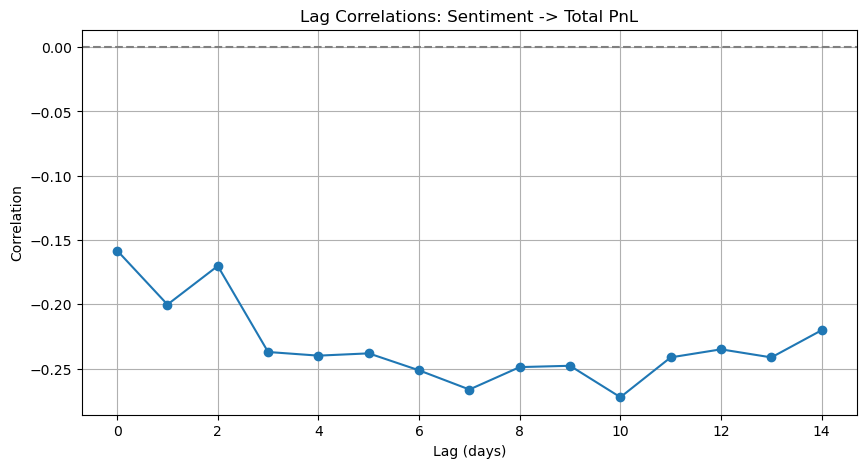

In [77]:
lags = list(ccfs.keys())
correlations = list(ccfs.values())

plt.figure(figsize=(10,5))
plt.plot(lags, correlations, marker='o')
plt.axhline(0, color='gray', linestyle='--')  
plt.title('Lag Correlations: Sentiment -> Total PnL')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


In [78]:
greed_days = df[df['sent_score'] > 0.5]['date']
fear_days  = df[df['sent_score'] < 0.5]['date']

In [79]:
def event_avg_pnl(days, window=3):
    res = []
    for d in days:
        mask = (df['date'] >= d - pd.Timedelta(days=window)) & (df['date'] <= d + pd.Timedelta(days=window))
        res.append(df.loc[mask,'total_pnl'].values)
    return res
greed_pnls = event_avg_pnl(greed_days, window=3)
fear_pnls  = event_avg_pnl(fear_days, window=3)

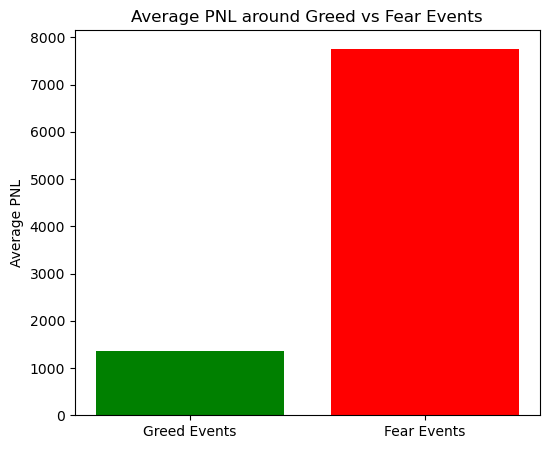

In [80]:
greed_flat = [val for arr in greed_pnls for val in arr]
fear_flat  = [val for arr in fear_pnls for val in arr]

mean_greed = np.mean(greed_flat)
mean_fear  = np.mean(fear_flat)

plt.figure(figsize=(6,5))
plt.bar(['Greed Events', 'Fear Events'], [mean_greed, mean_fear], color=['green','red'])
plt.ylabel("Average PNL")
plt.title("Average PNL around Greed vs Fear Events")
plt.show()


There is a 0% chance that the difference in performance between "Fear" days and "Greed" days is random.
This trader actually loses money (or makes significantly less) when the market is Greedy, and makes more money when the market is Fearful.

In [81]:
from scipy import stats

# Remove NaNs from your event lists
clean_greed = [x for x in greed_flat if str(x) != 'nan']
clean_fear = [x for x in fear_flat if str(x) != 'nan']

# Perform T-test
t_stat, p_val = stats.ttest_ind(clean_greed, clean_fear, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Statistically Significant difference between Fear and Greed performance!")
else:
    print("Result: The difference is likely due to random chance (not significant).")

T-Statistic: -6.4094
P-Value: 0.0000
Result: Statistically Significant difference between Fear and Greed performance!


When the market panics (Fear), you profit on BTC. When the market hypes (Greed), you lose or stagnate on BTC.
You cannot rely on the Fear & Greed Index to predict your Altcoin trades. Your Altcoin strategy is likely driven by specific coin news or pumps, not macro sentiment.

In [82]:
# Reload original data (since previous cells filtered it)
df_all = pd.read_csv('/home/josamhany/Historical Trader project/historical_data.csv') # Use your path
df_all['date'] = pd.to_datetime(df_all['Timestamp IST'], dayfirst=True).dt.date
df_all['date'] = pd.to_datetime(df_all['date'])

# Define subsets
btc_trades = df_all[df_all['Coin'].str.contains('BTC', na=False)]
alt_trades = df_all[~df_all['Coin'].str.contains('BTC', na=False)]

# Function to get correlation for a subset
def get_sentiment_corr(trade_subset, sentiment_df):
    daily = trade_subset.groupby('date')['Closed PnL'].sum().reset_index()
    merged = pd.merge(daily, sentiment_df[['date', 'sent_score']], on='date')
    return merged['Closed PnL'].corr(merged['sent_score'])

# Calculate & Print
btc_corr = get_sentiment_corr(btc_trades, sent)
alt_corr = get_sentiment_corr(alt_trades, sent)

print(f"Bitcoin PnL vs Sentiment Correlation: {btc_corr:.4f}")
print(f"Altcoin PnL vs Sentiment Correlation: {alt_corr:.4f}")

Bitcoin PnL vs Sentiment Correlation: -0.1582
Altcoin PnL vs Sentiment Correlation: -0.0865


In [83]:
# Filter for extreme days
extreme_fear = df[df['sent_score'] <= 0.2]
extreme_greed = df[df['sent_score'] >= 0.8]

# Calculate metrics
avg_pnl_fear = extreme_fear['total_pnl'].mean()
avg_pnl_greed = extreme_greed['total_pnl'].mean()
win_rate_fear = extreme_fear['pct_pos'].mean()
win_rate_greed = extreme_greed['pct_pos'].mean()

# Display Results
results = pd.DataFrame({
    'Metric': ['Average Daily PnL', 'Win Rate'],
    'Extreme Fear (<20)': [avg_pnl_fear, win_rate_fear],
    'Extreme Greed (>80)': [avg_pnl_greed, win_rate_greed]
})
print(results)

              Metric  Extreme Fear (<20)  Extreme Greed (>80)
0  Average Daily PnL          254.736693          1483.569281
1           Win Rate            0.256580             0.323547
